/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/erp/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129534 (\N{RECEIPT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


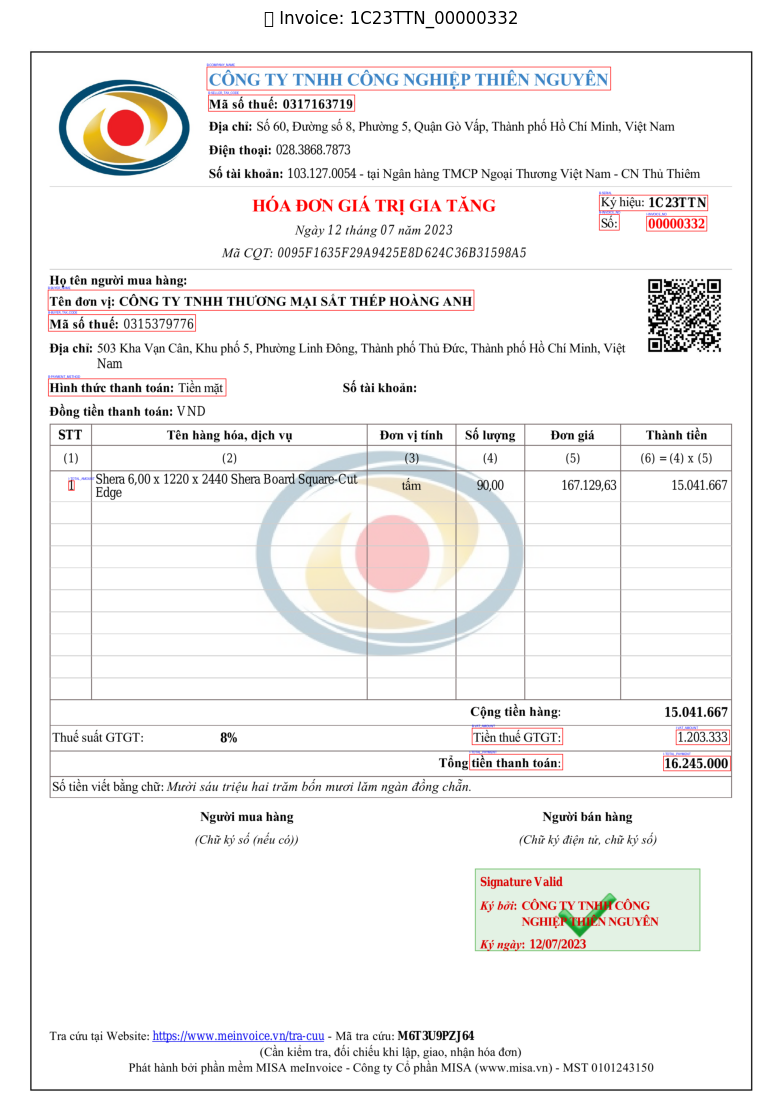

In [1]:
import json
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# üîß ƒê∆∞·ªùng d·∫´n file output (ch·ªçn INTERSECT ho·∫∑c UNION t√πy √Ω)
JSONL_PATH = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/BIO-TAGGING SCRIPTS/layoutlmv3_intersection.jsonl"  # ho·∫∑c "layoutlmv3_union.jsonl"
IMAGE_FOLDER = "/mnt/c/Users/Legion/Documents/jimmy tran/Automated-invoice-processing-system/converted_pngs"

# üìå Load d√≤ng ƒë·∫ßu ti√™n t·ª´ JSONL ƒë·ªÉ test
with open(JSONL_PATH, "r", encoding="utf-8") as f:
    sample = json.loads(f.readline())

invoice_id = sample["id"]
image_path = os.path.join(IMAGE_FOLDER, f"{invoice_id}.png")

# ‚úÖ Check n·∫øu ·∫£nh kh√¥ng t·ªìn t·∫°i
if not os.path.exists(image_path):
    print(f"‚ùå Kh√¥ng t√¨m th·∫•y ·∫£nh: {image_path}")
else:
    img = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(img)

    # üëâ V·∫Ω t·ª´ng bbox v√† label
    for word, bbox, label in zip(sample["words"], sample["bboxes"], sample["labels"]):
        draw.rectangle(bbox, outline="red", width=2)
        draw.text((bbox[0], bbox[1] - 12), label, fill="blue")

    # üëâ Hi·ªÉn th·ªã ·∫£nh ƒë√£ v·∫Ω
    plt.figure(figsize=(12, 14))
    plt.imshow(img)
    plt.title(f"üßæ Invoice: {invoice_id}")
    plt.axis("off")
    plt.show()
